## 📊 **Standard Deviation and Maximum Acceleration per Timestep (EventID)**

This notebook processes accelerometer data from the **Open Seizure Database (OSDB)** to analyze the **standard deviation** and **maximum acceleration** for each timestep in a specific event. The event selected for analysis is **`EventID`**.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import pandas as pd
import json

# Load the JSON file
file_path = '../datasets/osdb_3min_allSeizures.json'  # Replace with your JSON file path
with open(file_path, 'r') as file:
    raw_json = json.load(file)
    
# Flatten the JSON and extract relevant fields
flattened_data = []

for attribute in raw_json:
    user_id = attribute.get('userId', None)
    datapoints = attribute.get('datapoints', [])

    for point in datapoints:
        event_id = point.get('eventId', None)
        hr = point.get('hr', [])
        o2Sat = point.get('o2Sat', [])
        rawData = point.get('rawData', [])
        rawData3D = point.get('rawData3D', [])
        # Append every datapoint as a row
        flattened_data.append({
            'eventId': event_id,
            'userId': user_id,
            'hr': hr,
            'o2Sat': o2Sat,
            'rawData': rawData,
            'rawData3D': rawData3D,

        })
        
# Create a DataFrame
df_sensordata = pd.DataFrame(flattened_data)
df_sensordata.head()

,eventId,userId,hr,o2Sat,rawData,rawData3D
0,407,39,67,-1,"[1496, 1480, 1500, 1492, 1496, 1484, 1500, 149...",[]
1,407,39,67,-1,"[1492, 1508, 1496, 1476, 1484, 1476, 1496, 150...",[]
2,407,39,68,-1,"[1488, 1496, 1484, 1492, 1492, 1508, 1504, 148...",[]
3,407,39,69,-1,"[1488, 1476, 1480, 1504, 1496, 1508, 1484, 148...",[]
4,407,39,69,-1,"[1504, 1488, 1504, 1492, 1484, 1500, 1496, 149...",[]


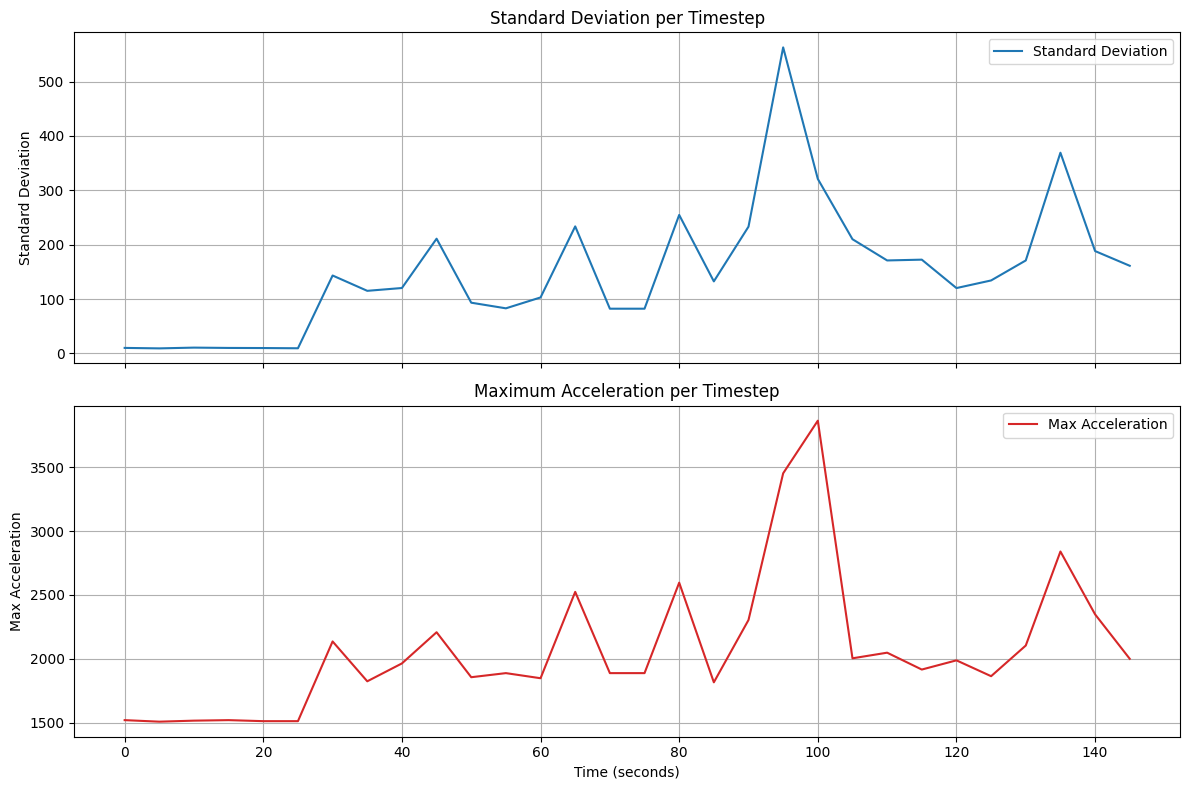

In [4]:
# Filter rows for eventId 407
event_id = 407
filtered_data = df_sensordata[df_sensordata['eventId'] == event_id]


# Extract rawData (1D array) and ensure it's not empty
raw_data = np.hstack(filtered_data['rawData'].dropna().values) if 'rawData' in filtered_data else np.array([])

# Ensure there is data for rawData
if raw_data.size == 0:
    raise ValueError("No rawData found for the given eventId")

# Number of timesteps (assuming 30)
num_timesteps = len(filtered_data)  # This should be 30 in your case (30 rows for 30 timesteps)

# Time axis (assuming 5 seconds per timestep)
time_axis = np.arange(0, num_timesteps * 5, 5)

# Now, we calculate the standard deviation and max acceleration per timestep

# Calculate the standard deviation for each timestep (assuming each timestep has a fixed number of values)
std_values = []
max_acceleration = []

# Assuming each timestep has `x` number of data points
timesteps_length = len(raw_data) // num_timesteps

for i in range(num_timesteps):
    # Get the data for the current timestep
    timestep_data = raw_data[i * timesteps_length:(i + 1) * timesteps_length]
    
    # Calculate the standard deviation for this timestep
    std_values.append(np.std(timestep_data))  # Standard deviation
    
    # Calculate the maximum acceleration for this timestep
    max_acceleration.append(np.max(timestep_data))  # Max acceleration

# Plot the STD and max acceleration in two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot the standard deviation for each timestep
axs[0].plot(time_axis, std_values, label="Standard Deviation", color='tab:blue')
axs[0].set_ylabel("Standard Deviation")
axs[0].set_title("Standard Deviation per Timestep")
axs[0].grid(True)
axs[0].legend()

# Plot the maximum acceleration for each timestep
axs[1].plot(time_axis, max_acceleration, label="Max Acceleration", color='tab:red')
axs[1].set_xlabel("Time (seconds)")
axs[1].set_ylabel("Max Acceleration")
axs[1].set_title("Maximum Acceleration per Timestep")
axs[1].grid(True)
axs[1].legend()

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


## 📝 **Workflow**

### 1. **📂 Loading and Flattening Data**
   - The accelerometer data is loaded from a **JSON** file, containing sensor readings from accelerometers.
   - Key fields such as **`userId`**, **`eventId`**, **`hr`** (heart rate), **`o2Sat`** (oxygen saturation), **`rawData`**, and **`rawData3D`** are extracted and stored for further analysis.

### 2. **🔄 Creating the DataFrame**
   - A **Pandas DataFrame** is created from the flattened data, making it easy to filter, process, and manipulate.

### 3. **🔍 Filtering for Specific Event**
   - The dataset is filtered to focus on **`EventID 407`**, isolating data for this event for further processing.

### 4. **📉 Extracting Raw Data**
   - The **rawData** (1D accelerometer data) is extracted and flattened into a continuous array.
   - If no raw data is found for the given event, an error is raised to ensure data integrity.

### 5. **⏱️ Calculating Standard Deviation and Maximum Acceleration**
   - For each timestep (assumed to be 5 seconds), the **standard deviation** and **maximum acceleration** are calculated.
   - **Standard deviation** represents the variability of the accelerometer data within a given timestep.
   - **Maximum acceleration** is the highest recorded value within the timestep, providing insight into movement intensity.

### 6. **📊 Plotting Results**
   - Two separate plots are generated:
     1. **Standard Deviation** per timestep.
     2. **Maximum Acceleration** per timestep.
   - These plots are displayed over time, helping visualize how the variability and intensity of movement evolve during the event.

---

## 📍 **Key Features**
- **📉 Standard Deviation** shows the variability of accelerometer data over time.
- **⚡ Maximum Acceleration** highlights peaks of movement intensity.
- **📅 Timestep-based Analysis** enables detailed temporal insight into the event's dynamics.

---

## 👤 **Author**  
Developed for the Open Seizure Database by **Jamie Pordoy**.
